# Redes Neurais: Problemas de Regressão

Autor: Arthur Schneider Figueira

## Lendo as bibliotecas

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 25)

In [3]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

## Base de Dados Car Price

* Fonte: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?resource=download

Há tanto o banco de dados quanto um dicionário de dados.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Databases/CarPrice_Assignment.csv')
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
df = df.drop(columns = ['car_ID'])

## Tratamento de Dados

### Dividindo a base entre treino, teste e validação

In [9]:
X = df.drop(columns = ['price']) # pegando o db sem a variável resposta
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=2023)
# Tiro uma parte do teste para colocar na validacao
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.40, random_state=2023)

print(f" Treino {len(X_train)}, Teste {len(X_test)}, Validacao {len(X_val)}")
#Teremos uma amostra maior para treinar o modelo, uma menor para testar.
#Fora isso, temos uma parte dos dados que não fizeram parte da modelagem (dados "novos") para validar

 Treino 123, Teste 49, Validacao 33


### Criando a variavel marca

In [10]:
X_train['marca'] = [x.split()[0] for x in list(X_train.CarName)]
X_test['marca'] = [x.split()[0] for x in list(X_test.CarName)]
X_val['marca'] = [x.split()[0] for x in list(X_val.CarName)]

In [11]:
dict(X_train.marca.value_counts())

{'toyota': 14,
 'nissan': 10,
 'mazda': 10,
 'peugeot': 9,
 'subaru': 8,
 'volkswagen': 8,
 'mitsubishi': 7,
 'honda': 7,
 'volvo': 6,
 'dodge': 6,
 'buick': 5,
 'saab': 5,
 'audi': 4,
 'plymouth': 4,
 'porsche': 4,
 'bmw': 2,
 'isuzu': 2,
 'alfa-romero': 2,
 'chevrolet': 2,
 'jaguar': 2,
 'mercury': 1,
 'vw': 1,
 'Nissan': 1,
 'maxda': 1,
 'renault': 1,
 'toyouta': 1}

In [12]:
marcas_volume = [x for x in list(X_train.marca.unique()) if dict(X_train.marca.value_counts())[x] > (len(X_train)*0.05)]
marcas_volume

['nissan',
 'peugeot',
 'mazda',
 'subaru',
 'volkswagen',
 'honda',
 'toyota',
 'mitsubishi']

In [13]:
X_train['price'] = y_train #Depois a gente deleta
media_resposta = X_train['price'].mean()
media_resposta

13208.138211382115

In [15]:
resumo = X_train.groupby(['marca'])['price'].agg(['mean']).reset_index()
marcas_baratas = resumo.loc[(resumo['mean'] <= media_resposta) & (~(resumo['marca'].isin(marcas_volume))),'marca']
marcas_caras = resumo.loc[(resumo['mean'] > media_resposta) & (~(resumo['marca'].isin(marcas_volume))),'marca']
print(marcas_baratas, marcas_caras)

0        Nissan
5     chevrolet
6         dodge
8         isuzu
10        maxda
16     plymouth
18      renault
25           vw
Name: marca, dtype: object 1     alfa-romero
2            audi
3             bmw
4           buick
9          jaguar
12        mercury
17        porsche
19           saab
22        toyouta
24          volvo
Name: marca, dtype: object


In [16]:
X_train.loc[(~(X_train.marca.isin(marcas_volume))) & (X_train.marca.isin(marcas_baratas)),'marca'] = 'marcas_baratas'
X_test.loc[(~(X_test.marca.isin(marcas_volume))) & (X_test.marca.isin(marcas_baratas)),'marca'] = 'marcas_baratas'
X_val.loc[(~(X_val.marca.isin(marcas_volume))) & (X_val.marca.isin(marcas_baratas)),'marca'] = 'marcas_baratas'

X_train.loc[(~(X_train.marca.isin(marcas_volume))) & (X_train.marca.isin(marcas_caras)),'marca'] = 'marcas_caras'
X_test.loc[(~(X_test.marca.isin(marcas_volume))) & (X_test.marca.isin(marcas_caras)),'marca'] = 'marcas_caras'
X_val.loc[(~(X_val.marca.isin(marcas_volume))) & (X_val.marca.isin(marcas_caras)),'marca'] = 'marcas_caras'

In [17]:
marca_vlr = X_train.groupby(['marca'])['price'].agg(['mean']).reset_index()
marca_vlr.head(3)

,marca,mean
0,honda,8379.857143
1,marcas_baratas,7805.250000
2,marcas_caras,22833.765625


In [18]:
for idx in range(0,len(marca_vlr)):
  X_train.loc[(X_train.marca == marca_vlr['marca'][idx]),'marca_num'] = marca_vlr['mean'][idx]
  X_test.loc[(X_test.marca == marca_vlr['marca'][idx]),'marca_num'] = marca_vlr['mean'][idx]
  X_val.loc[(X_val.marca == marca_vlr['marca'][idx]),'marca_num'] = marca_vlr['mean'][idx]

### Convertendo variaveis categoricas em numericas

In [19]:
vars_cat = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','symboling','fuelsystem','enginetype','cylindernumber']

vars_mdl = ['marca_num']

for var in vars_cat:
  #Tratamento de volumetria de dados
  var_volume = [x for x in list(X_train[var].unique()) if dict(X_train[var].value_counts())[x] > (len(X_train)*0.05)]
  X_train.loc[(~(X_train[var].isin(var_volume))),var] = 'outros'
  X_test.loc[(~(X_test[var].isin(var_volume))),var] = 'outros'
  X_val.loc[(~(X_val[var].isin(var_volume))),var] = 'outros'

  vlr = X_train.groupby([var])['price'].agg(['mean']).reset_index()
  #Gero os numeros conforme X_train
  colname = var+'num'

  for idx in range(0,len(vlr)):
    X_train.loc[(X_train[var] == vlr[var][idx]),colname] = vlr['mean'][idx]
    #Aplico os valores de X_train no teste e validação: é importante seguir esse método (boas praticas)
    X_test.loc[(X_test[var] == vlr[var][idx]),colname] = vlr['mean'][idx]
    X_val.loc[(X_val[var] == vlr[var][idx]),colname] = vlr['mean'][idx]
  vars_mdl.append(colname)

vars_mdl

['marca_num',
 'fueltypenum',
 'aspirationnum',
 'doornumbernum',
 'carbodynum',
 'drivewheelnum',
 'enginelocationnum',
 'symbolingnum',
 'fuelsystemnum',
 'enginetypenum',
 'cylindernumbernum']

### Removendo colunas desnecessarias

In [20]:
#Nao preciso manter as variaveis categoricas
X_train = X_train.drop(columns = vars_cat+['CarName','marca','price'])
X_test = X_test.drop(columns = vars_cat+['CarName','marca'])
X_val = X_val.drop(columns = vars_cat+['CarName','marca'])

### Analise Descritiva

In [21]:
X_train.describe() #percentiles = []

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,marca_num,fueltypenum,aspirationnum,doornumbernum,carbodynum,drivewheelnum,enginelocationnum,symbolingnum,fuelsystemnum,enginetypenum,cylindernumbernum
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.00000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,98.722764,173.977236,65.968293,53.734959,2551.219512,125.96748,3.330407,3.239390,10.291870,103.349593,5123.983740,25.170732,30.861789,13208.138211,13208.138211,13208.138211,13208.138211,13208.138211,13208.138211,13208.138211,13208.138211,13208.138211,13208.138211,13208.138211
std,6.016273,11.977101,2.163835,2.565821,518.533597,42.24071,0.275197,0.318158,4.035429,40.165229,495.361666,6.142712,6.525266,6015.373100,987.889349,1175.879923,525.095704,3948.285721,5194.336699,2881.286564,3062.425718,4637.594479,4313.471095,5423.553719
min,86.600000,144.600000,62.500000,47.800000,1819.000000,70.00000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000,7805.250000,12869.909091,12676.764706,12760.591549,10550.137500,8710.200000,12839.214876,9824.666667,7461.858974,11109.405882,10481.423469
25%,94.500000,166.550000,64.050000,51.600000,2134.000000,97.00000,3.150000,3.110000,8.700000,70.000000,4800.000000,19.000000,25.000000,8379.857143,12869.909091,12676.764706,12760.591549,10550.137500,9391.817568,12839.214876,10553.969697,7461.858974,11109.405882,10481.423469
50%,96.900000,172.400000,65.500000,54.100000,2414.000000,110.00000,3.310000,3.270000,9.000000,95.000000,5200.000000,25.000000,31.000000,9716.875000,12869.909091,12676.764706,12760.591549,13524.533898,9391.817568,12839.214876,13802.421053,16070.076923,11109.405882,10481.423469
75%,102.400000,184.850000,66.900000,55.700000,2936.500000,140.50000,3.580000,3.400000,9.400000,114.000000,5500.000000,30.000000,35.000000,22833.765625,12869.909091,12676.764706,13819.211538,13524.533898,20137.625000,12839.214876,14978.810526,17508.723214,13520.100000,10481.423469
max,115.600000,202.600000,72.300000,59.800000,4066.000000,326.00000,3.940000,4.170000,23.000000,288.000000,6600.000000,45.000000,50.000000,22833.765625,16070.076923,15789.095238,13819.211538,27241.500000,20137.625000,35528.000000,18984.133333,17508.723214,28533.857143,24241.321429


### Identificacao de Missings

In [22]:
X_train.isna().sum().sum()

0

In [23]:
X_test.isna().sum().sum()

print(len(X_test))
X_test = X_test.dropna()
print(len(X_test))

49
48


In [24]:
y_test = y_test[X_test.index] #Preciso manter com a mesma qt de elementos

In [25]:
X_val.isna().sum().sum()

print(len(X_val))
X_val = X_val.dropna()
print(len(X_val))

33
32


In [26]:
y_val = y_val[X_val.index] #Preciso manter com a mesma qt de elementos

### Padronizacao dos Dados (MaxMin)

* Os dados ficarão na escala de 0 a 1

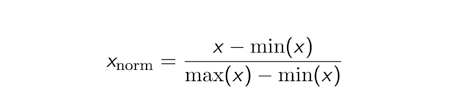

In [27]:
X_train.dtypes

wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginesize             int64
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
marca_num            float64
fueltypenum          float64
aspirationnum        float64
doornumbernum        float64
carbodynum           float64
drivewheelnum        float64
enginelocationnum    float64
symbolingnum         float64
fuelsystemnum        float64
enginetypenum        float64
cylindernumbernum    float64
dtype: object

In [28]:
for col in list(X_train.columns):
  maximo = X_train[col].max()
  minimo = X_train[col].min()

  X_train[col] = (X_train[col] - minimo) / (maximo - minimo)

  #Novamente, uso os dados de X_train para replicar no treino e validação
  X_test[col] = (X_test[col] - minimo) / (maximo - minimo)
  X_val[col] = (X_val[col] - minimo) / (maximo - minimo)

In [29]:
#Todos os dados estao entre 0 e 1
X_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,marca_num,fueltypenum,aspirationnum,doornumbernum,carbodynum,drivewheelnum,enginelocationnum,symbolingnum,fuelsystemnum,enginetypenum,cylindernumbernum
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.418026,0.506504,0.353907,0.494580,0.325865,0.218623,0.564576,0.556852,0.205742,0.217583,0.397544,0.380335,0.437111,0.359509,0.105691,0.170732,0.422764,0.159244,0.393609,0.016260,0.369396,0.571948,0.120448,0.198164
std,0.207458,0.206502,0.220800,0.213818,0.230767,0.165003,0.196569,0.151504,0.252214,0.170192,0.202188,0.191960,0.191920,0.400264,0.308699,0.377813,0.496019,0.236547,0.454550,0.126992,0.334345,0.461596,0.247553,0.394157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.378448,0.158163,0.316667,0.140187,0.105469,0.435714,0.495238,0.106250,0.076271,0.265306,0.187500,0.264706,0.038234,0.000000,0.000000,0.000000,0.000000,0.059648,0.000000,0.079623,0.000000,0.000000,0.000000
50%,0.355172,0.479310,0.306122,0.525000,0.264798,0.156250,0.550000,0.571429,0.125000,0.182203,0.428571,0.375000,0.441176,0.127200,0.000000,0.000000,0.000000,0.178200,0.059648,0.000000,0.434278,0.856806,0.000000,0.000000
75%,0.544828,0.693966,0.448980,0.658333,0.497330,0.275391,0.742857,0.633333,0.150000,0.262712,0.551020,0.531250,0.558824,1.000000,0.000000,0.000000,1.000000,0.178200,1.000000,0.000000,0.562712,1.000000,0.138351,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
max_y = y_train.max()

In [31]:
min_y = y_train.min()

In [32]:
y_train = (y_train - min_y) / (max_y-min_y)
y_test = (y_test - min_y) / (max_y-min_y)
y_val = (y_val - min_y) / (max_y-min_y)

In [37]:
# len(X_train.columns)
print(y_test)

26     0.061839
4      0.306142
50     0.001912
82     0.186460
146    0.058215
158    0.069013
189    0.160791
17     0.788491
57     0.211683
201    0.345738
10     0.280820
149    0.163249
143    0.120203
91     0.038007
168    0.112234
23     0.070478
21     0.011271
174    0.138523
199    0.343379
81     0.083933
130    0.103694
43     0.041383
150    0.005710
41     0.194305
144    0.102155
124    0.189812
171    0.159649
103    0.208058
102    0.230401
156    0.045181
9      0.316299
33     0.035028
132    0.167122
153    0.044685
152    0.034010
18     0.000819
45     0.094298
165    0.103768
85     0.046448
113    0.287399
105    0.361973
61     0.135966
194    0.194181
178    0.283998
170    0.150961
179    0.270096
76     0.006728
122    0.061839
Name: price, dtype: float64


## Modelagem

### Parametros da Rede Neural

* Early Stopping

In [38]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

* Learning Rate

In [39]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.005
    elif epoch < 100:
        return 0.001
    elif epoch < 150:
        return 0.0005
    else:
        return 0.0001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

Lembrete: esses parâmetros (early stopping e learning rate) são utilizados como callbacks:



```
# Treinando o modelo
model.fit(X_train, y_train, epochs=200, batch_size=16, callbacks=[lr_scheduler_callback,early_stopping_callback])
```



* Treinamento com Treino e Teste



```
# Treinando o modelo com os dados de treinamento e calculando a perda no conjunto de teste
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

```



### Modelo 1

In [40]:
# Crie o modelo sequencial
model = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1.0))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

In [42]:
history = model.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/1000
2/2 [==============================] - 2s 309ms/step - loss: 0.3409 - val_loss: 0.0125 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.0295 - val_loss: 0.0188 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0317 - val_loss: 0.0114 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.0157 - val_loss: 0.0094 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0126 - val_loss: 0.0047 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.0099 - val_loss: 0.0124 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.0086 - val_loss: 0.0041 - lr: 0.0050
Epoch 8/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.0091 - val_loss: 0.0033 - lr: 0.0050
Epoch 9/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0060 - val_loss: 0.0118 - lr

In [43]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss = history.history['loss']
test_loss = history.history['val_loss']

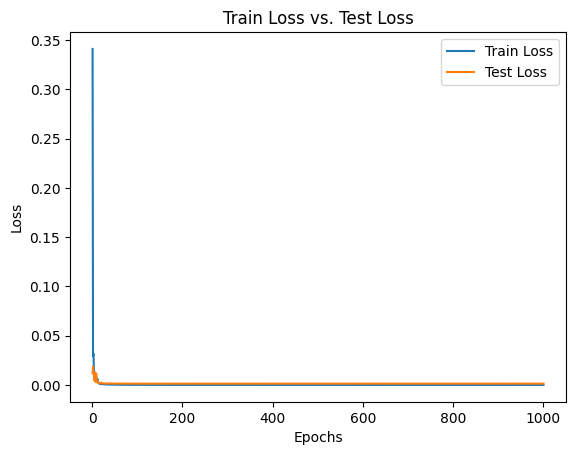

In [44]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

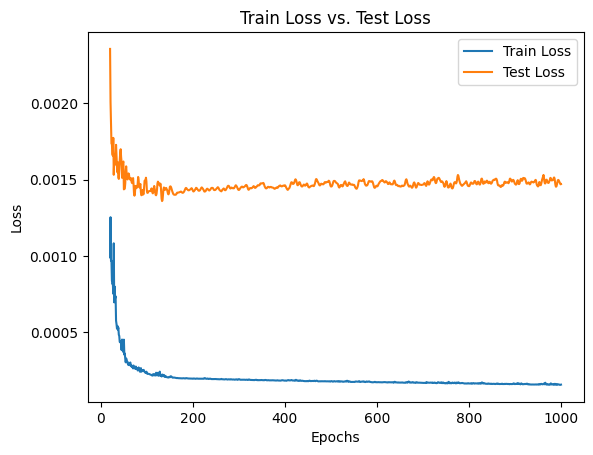

In [45]:
# Plotando o gráfico comparativo a partir da epoch 25
epochs = range(20, len(train_loss) + 1)
plt.plot(epochs, train_loss[19:], label='Train Loss')
plt.plot(epochs, test_loss[19:], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Modelo 2

In [46]:
# Crie o model2o sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um model2o de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o model2o
model2.compile(optimizer='adam', loss='mean_squared_error')


In [47]:
history2 = model2.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test)))

Epoch 1/1000
2/2 [==============================] - 2s 219ms/step - loss: 0.9417 - val_loss: 0.0225 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.0506 - val_loss: 0.0194 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0365 - val_loss: 0.0977 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.0743 - val_loss: 0.0145 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.0319 - val_loss: 0.0193 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.0397 - val_loss: 0.0125 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.0261 - val_loss: 0.0187 - lr: 0.0050
Epoch 8/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.0188 - val_loss: 0.0150 - lr: 0.0050
Epoch 9/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.0127 - val_loss: 0.0064 - lr

In [48]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

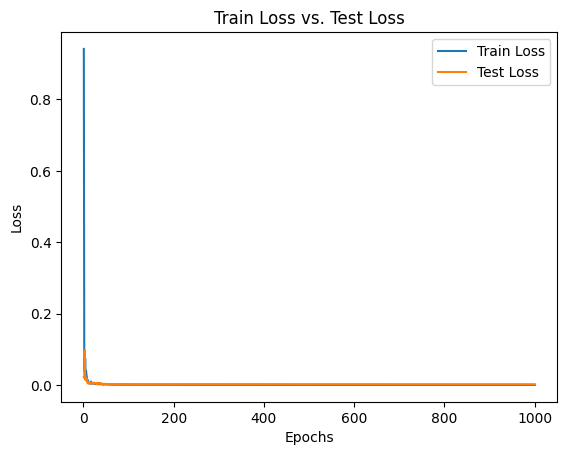

In [49]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Train Loss')
plt.plot(epochs, test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

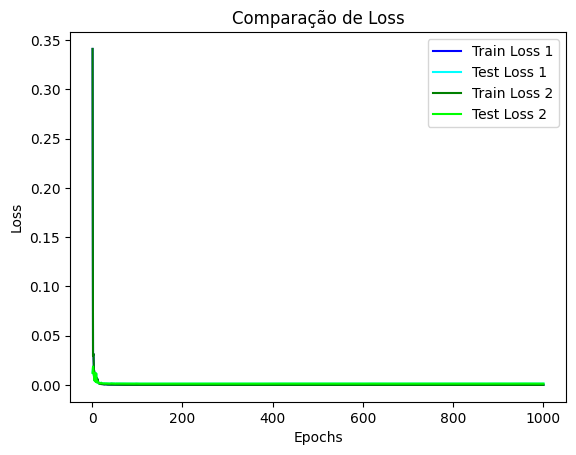

In [52]:
# Interpolação para ajustar as curvas de perda com a mesma quantidade de pontos
epochs1 = range(1, len(train_loss) + 1)
epochs2 = np.linspace(1, len(train_loss), len(train_loss2))
train_loss2_interp = np.interp(epochs2, epochs1, train_loss)
test_loss2_interp = np.interp(epochs2, epochs1, test_loss)

# Plotando o gráfico comparativo
plt.plot(epochs1, train_loss, label='Train Loss 1', color='blue')
plt.plot(epochs1, test_loss, label='Test Loss 1', color='cyan')
plt.plot(epochs2, train_loss2_interp, label='Train Loss 2', color='green')
plt.plot(epochs2, test_loss2_interp, label='Test Loss 2', color='lime')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparação de Loss')
plt.legend()
plt.show()

Neste exemplo, comparamos a mesma arquitetura de rede neural, alterando apenas a função de perda.

No modelo 1, a função de perda era Huber Loss. No modelo 2, RMSE.

Vale ressaltar, que os resultados dos modelos dependem da inicialização. Portanto, isso pode variar, dependendo da execução.

**Percebemos que, o modelo 1 apresentou um erro melhor.**

### Teste Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
# Criar e treinar o modelo de Random Forest
model_rf = RandomForestRegressor(min_samples_leaf=int(len(X_train)*0.05),random_state=2023,n_estimators=250)
# n_estimators = Qt de arvores;
# min_samples_leaf = qt de dados necessario em cada folha
# random_state = semente

In [55]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=6, n_estimators=250, random_state=2023)

### Comparando os modelos

In [56]:
# Avaliar o modelo 1 (funcao de perda Huber) no conjunto de validação
val_predictions1 = model.predict(X_val)

1/1 [==============================] - 0s 143ms/step


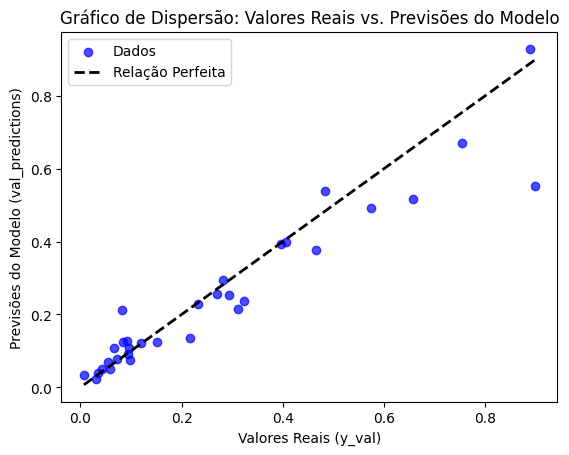

In [57]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictions1, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [58]:
# Avaliar o modelo 2 (funcao de perda RMSE) no conjunto de validação
val_predictions2 = model2.predict(X_val)

1/1 [==============================] - 0s 473ms/step


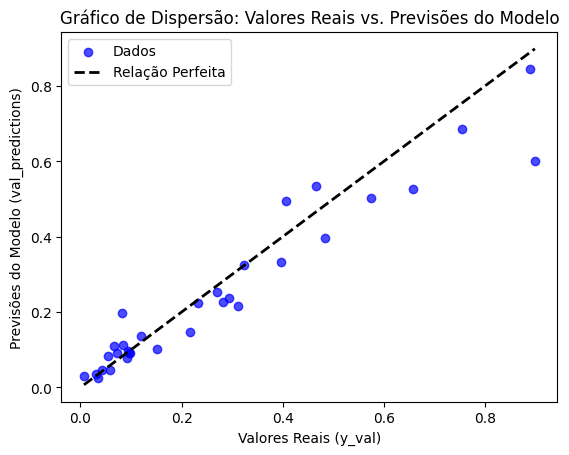

In [59]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictions2, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [60]:
# Avaliar o modelo de Random Forest no conjunto de validação
val_predictionsrf = model_rf.predict(X_val)

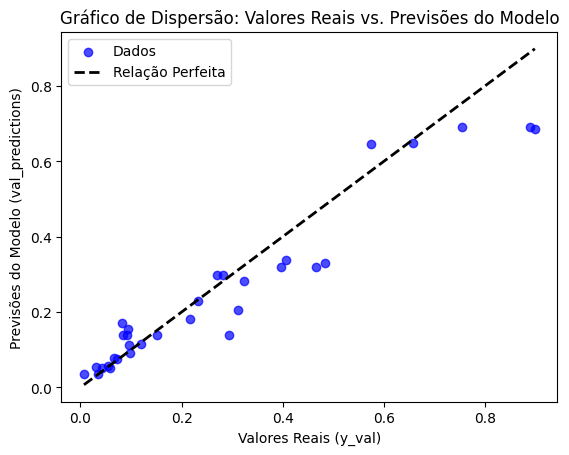

In [61]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictionsrf, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error

print(f'Modelo Redes Neurais RMSE: {mean_squared_error(y_val, val_predictions1, squared=False):.4f}')
print(f'Modelo Redes Neurais Huber: {mean_squared_error(y_val, val_predictions2, squared=False):.4f}')
print(f'Modelo RF: {mean_squared_error(y_val, val_predictionsrf, squared=False):.4f}')

Modelo Redes Neurais RMSE: 0.0819
Modelo Redes Neurais Huber: 0.0756
Modelo RF: 0.0806


* Nesse teste, a rede neural com a função de perda Huber Loss obteve um erro menor que os demais modelos.

* O modelo Random Forest teve um erro menor que a Rede Neural com a função de erro RMSE.

O ranking dos modelo ficou, como:
1. Rede Neural Huber Loss: RMSE 0.0690;
2. Random Forest: RMSE 0.0806
3. Rede Neural RMSE: RMSE 0.0891.

# Atividade

A base '05_df_treino_teste.csv' envolve características de imóveis e o preço de venda desses respectivos imóveis. Nessa base contém um conjunto variáveis explicativas. **Algumas dessas variáveis** são geradas após a venda do imóvel. Por esse motivo, na base '05_validacao.csv', constam menos colunas.

Da atividade:
1. Tratamento de dados: tratamento de missing, conversão de variável categórica para numérica e criação de novas variáveis;
2. Teste diferentes arquiteturas de redes neurais, utilizando a base '05_df_treino_teste.csv'. Não esqueça de dividir entre treino e teste.
3. Faça a predição na base '05_validacao.csv'. Cada grupo poderá enviar até 3 colunas de predição. É obrigatório enviar a coluna PRT_ID e as três colunas de predição.

Lembrem-se que a coluna **PRT_ID** não é uma variável explicativa.

In [ ]:
df2 = pd.read_csv('/content/05_validacao.csv',sep=';')
df2.tail()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
2104,P09034,Anna Nagar,1838,31,2.0,1.0,5,AdjLand,Yes,16/05/1971,Commercial,ELO,No Access,RH,2.7,3.7,3.2,3.15
2105,P02617,Chrompet,1191,189,1.0,1.0,3,Partial,Yes,07/09/1988,House,ELO,Gravel,RL,4.1,2.9,3.7,3.50
2106,P03449,KK Nagar,2317,37,4.0,2.0,6,AbNormal,No,31/03/1983,House,NoSewr,Paved,RH,5.0,4.6,2.2,3.76
2107,P06766,KK Nagar,2344,181,4.0,2.0,6,Normal Sale,No,04/06/1992,Commercial,NoSeWa,Gravel,RM,3.8,2.4,4.6,3.70
2108,P05763,Karapakkam,1008,194,1.0,1.0,3,Partial,Yes,03/01/1979,Commercial,NoSeWa,No Access,RL,2.5,4.5,3.4,3.46


In [ ]:
df2.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],
      dtype='object')